# Customer Churn Prediction

## Prepared by: Appurva Talashilkar

Objective : Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment

## Data Collection and Preprocessing:

### Importing libraries

In [217]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Loading Dataset

In [218]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [219]:
df = pd.read_excel('Desktop/customer_churn.xlsx')
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


### Data Exploration

In [220]:
df.drop(["CustomerID"], inplace = True, axis = 1)

In [221]:
df.head(5)

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,Customer_2,62,Female,New York,1,48.76,172,0
2,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,Customer_4,36,Female,Miami,3,97.94,297,1
4,Customer_5,46,Female,Miami,19,58.14,266,0


In [222]:
df.shape

(100000, 8)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        100000 non-null  object 
 1   Age                         100000 non-null  int64  
 2   Gender                      100000 non-null  object 
 3   Location                    100000 non-null  object 
 4   Subscription_Length_Months  100000 non-null  int64  
 5   Monthly_Bill                100000 non-null  float64
 6   Total_Usage_GB              100000 non-null  int64  
 7   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.1+ MB


In [224]:
# Check for missing values
df.isna().sum()

Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [225]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [226]:
df.dtypes

Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [227]:
df['Churn'].value_counts()


0    50221
1    49779
Name: Churn, dtype: int64

In [228]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [229]:
df.nunique()

Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [230]:
df.dropna(inplace=True)

In [231]:
df.fillna(df.mean(), inplace=True)

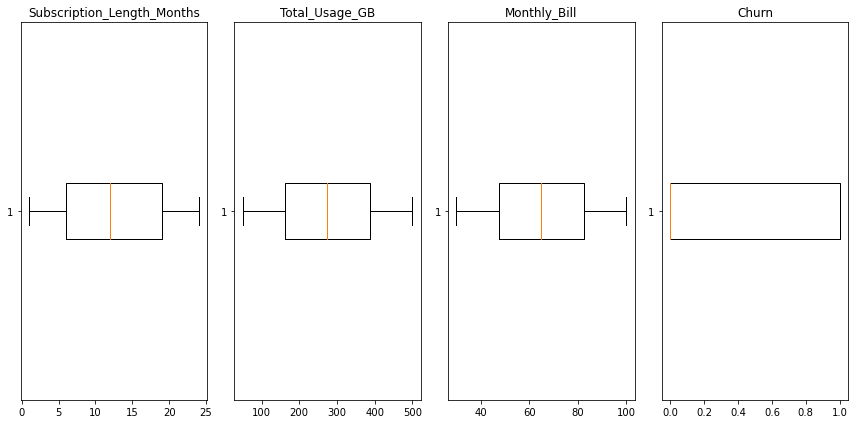

In [232]:
# Defining the columns to check for outliers
columns_to_check = [ 'Subscription_Length_Months', 'Total_Usage_GB','Monthly_Bill','Churn']

# Creating box plots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    plt.boxplot(df[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()

In [233]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Looping through columns to remove outliers
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)


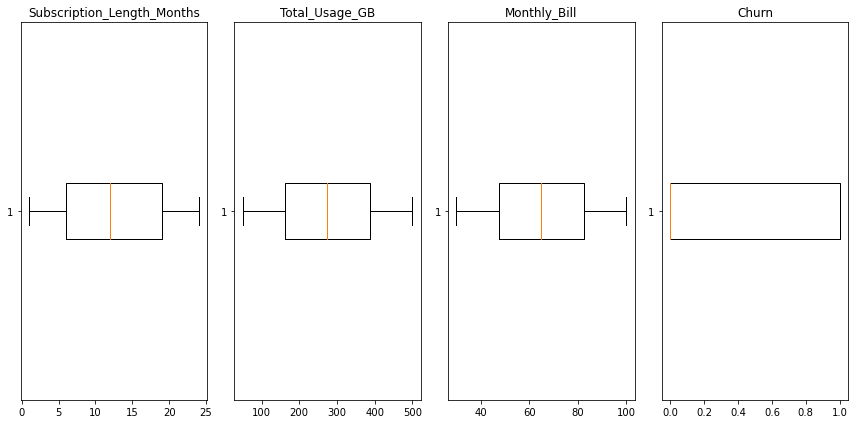

In [234]:
# Defining the columns to check for outliers
columns_to_check = [ 'Subscription_Length_Months', 'Total_Usage_GB','Monthly_Bill','Churn']

# Creating box plots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    plt.boxplot(df[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()

### Feature engineering

In [235]:
# Create a frequency encoding for a categorical feature 'City'
loc_freq = df['Location'].value_counts(normalize=True).to_dict()
df['Location_Frequency_Encoded'] = df['Location'].map(loc_freq)


In [236]:
loc_freq

{'Houston': 0.20157,
 'Los Angeles': 0.20041,
 'Miami': 0.20031,
 'Chicago': 0.19958,
 'New York': 0.19813}

In [237]:
gender_freq = df['Gender'].value_counts(normalize=True).to_dict()
df['Location_Frequency_Encoded'] = df['Gender'].map(gender_freq)


In [238]:
gender_freq

{'Female': 0.50216, 'Male': 0.49784}

In [239]:
churn_freq = df['Churn'].value_counts(normalize=True).to_dict()
df['Location_Frequency_Encoded'] = df['Churn'].map(churn_freq)

In [240]:
churn_freq

{0: 0.50221, 1: 0.49779}

### One Hot encoding

In [241]:
data_encoded = pd.get_dummies(df, columns=['Gender'])
print(data_encoded) 

                  Name  Age     Location  Subscription_Length_Months  \
0           Customer_1   63  Los Angeles                          17   
1           Customer_2   62     New York                           1   
2           Customer_3   24  Los Angeles                           5   
3           Customer_4   36        Miami                           3   
4           Customer_5   46        Miami                          19   
...                ...  ...          ...                         ...   
99995   Customer_99996   33      Houston                          23   
99996   Customer_99997   62     New York                          19   
99997   Customer_99998   64      Chicago                          17   
99998   Customer_99999   51     New York                          20   
99999  Customer_100000   27  Los Angeles                          19   

       Monthly_Bill  Total_Usage_GB  Churn  Location_Frequency_Encoded  \
0             73.36             236      0                   

In [242]:
data_encoded.head()

,Name,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Frequency_Encoded,Gender_Female,Gender_Male
0,Customer_1,63,Los Angeles,17,73.36,236,0,0.50221,0,1
1,Customer_2,62,New York,1,48.76,172,0,0.50221,1,0
2,Customer_3,24,Los Angeles,5,85.47,460,0,0.50221,1,0
3,Customer_4,36,Miami,3,97.94,297,1,0.49779,1,0
4,Customer_5,46,Miami,19,58.14,266,0,0.50221,1,0


In [243]:
df['Average_Monthly_Usage'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']


In [244]:
df.Average_Monthly_Usage

0         13.882353
1        172.000000
2         92.000000
3         99.000000
4         14.000000
            ...    
99995      9.826087
99996     18.473684
99997     14.764706
99998     21.700000
99999      9.105263
Name: Average_Monthly_Usage, Length: 100000, dtype: float64

### Data Visualization

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


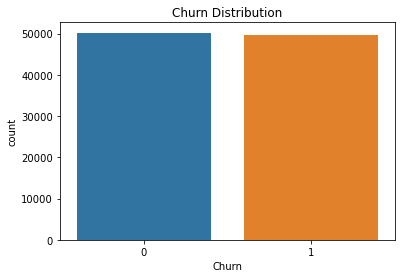

In [245]:
sns.countplot(df['Churn'])
plt.title('Churn Distribution')
plt.show()

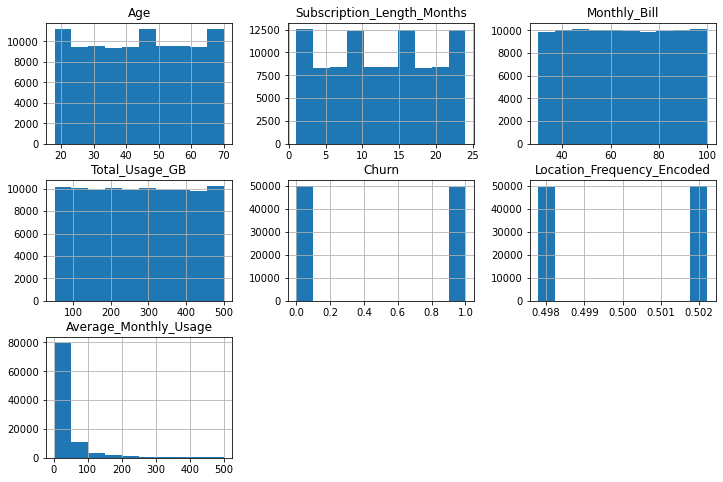

In [246]:
# Histograms of numeric features
df.hist(figsize=(12, 8))
plt.show()


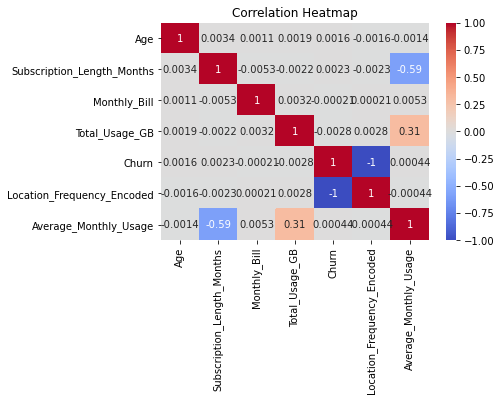

In [247]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


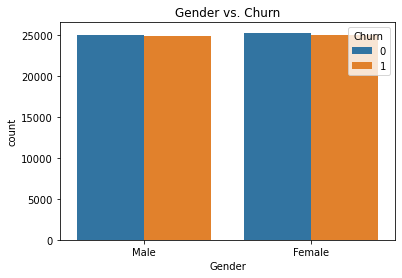

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


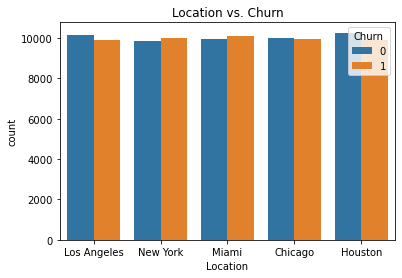

In [248]:
# Count plots for categorical features
categorical_columns = ['Gender', 'Location']  # Replace with your categorical columns
for col in categorical_columns:
    sns.countplot(df[col], hue=df['Churn'])
    plt.title(f'{col} vs. Churn')
    plt.show()


/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


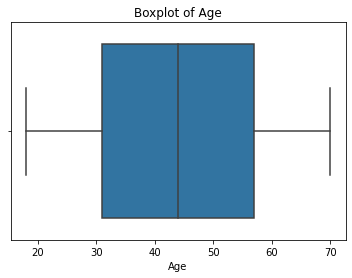

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


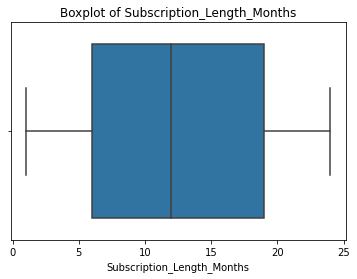

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


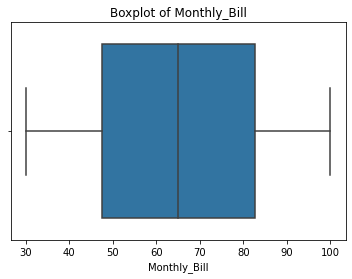

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


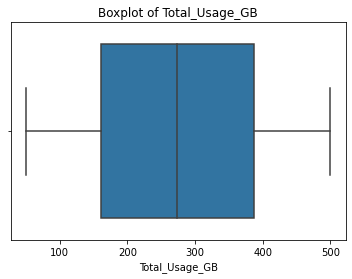

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


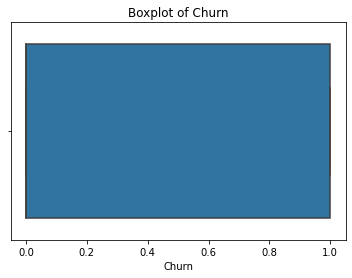

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


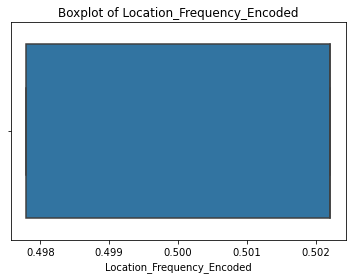

/Users/APPLE/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


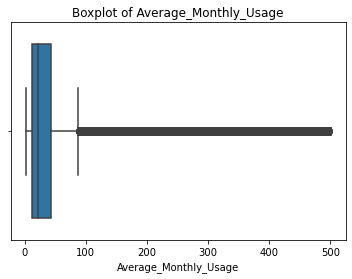

In [249]:
# Box plots to detect outliers in numeric features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


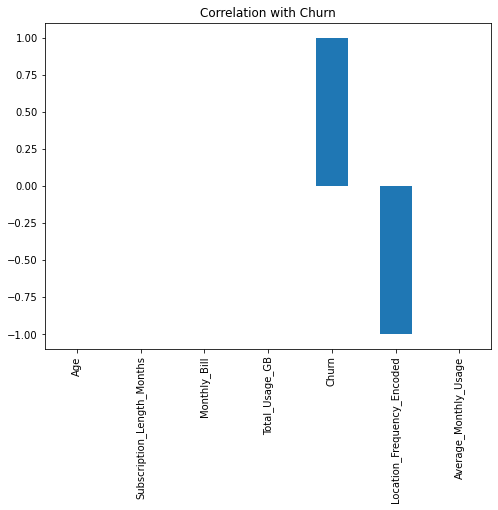

In [250]:
# Correlation between numeric features and the target variable (Churn)
correlation_with_churn = df[numeric_columns].corrwith(df['Churn'])
correlation_with_churn.plot(kind='bar', figsize=(8, 6))
plt.title('Correlation with Churn')
plt.show()


### Train-Test Split

In [251]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [253]:
x = df[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Location_Frequency_Encoded']]
y= df['Churn']


In [254]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


### Model Evaluation

#### Model 1 : Logistic Regression

In [256]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)


0.49415

In [257]:
y_pred = log_reg.predict(x_test)


In [258]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [259]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.49415
Precision: 0.4973143759873618
Recall: 0.15584158415841584
F1 Score: 0.2373162457595175
Confusion Matrix:
[[8309 1591]
 [8526 1574]]


#### Upsampling for better accuracy

In [260]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [261]:
from collections import Counter


In [262]:
pip install smote-variants

Note: you may need to restart the kernel to use updated packages.


In [263]:
pip install smot

Note: you may need to restart the kernel to use updated packages.


In [264]:
from imblearn.combine import SMOTEENN

In [265]:
smot = SMOTEENN()
x_upSampled, y_upSampled = smot.fit_resample(x,y)


In [266]:
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_upSampled)))


The number of classes before fit Counter({0: 50221, 1: 49779})
The number of classes after fit Counter({1: 6589, 0: 6511})


In [267]:
xup_train, xup_test, yup_train, yup_test = train_test_split(x_upSampled, y_upSampled, test_size=0.2)


In [268]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(xup_train,yup_train)
log_reg.score(xup_test,yup_test)


0.7122137404580152

In [269]:
y_pred = log_reg.predict(xup_test)


In [270]:
# Evaluate the model
accuracy = accuracy_score(yup_test, y_pred)
precision = precision_score(yup_test, y_pred)
recall = recall_score(yup_test, y_pred)
f1 = f1_score(yup_test, y_pred)
conf_matrix = confusion_matrix(yup_test, y_pred)

In [271]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.7122137404580152
Precision: 0.8113391984359726
Recall: 0.5966930265995687
F1 Score: 0.6876553438276719
Confusion Matrix:
[[1036  193]
 [ 561  830]]


#### Model 2 : Decision tree Classifier

In [272]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

1.0

In [273]:
y_pred = clf.predict(x_test)

In [274]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [275]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 9900     0]
 [    0 10100]]


#### Model 3 : Random Forest Classifier

In [276]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

1.0

In [277]:
y_pred = rfc.predict(x_test)

In [278]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [279]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 9900     0]
 [    0 10100]]


Saving the model:


In [280]:
import pickle

filename = 'trained_model.sav'

pickle.dump(rfc, open(filename, 'wb'))


### Conclusion:

In this project it shows that the models used like Logistic Regression, Decision tree Classifier and Random Forest Classifier has accuracy of 71%,100% & 100% respectively.
Therefore, Random tree classifier and decision tree classifier is the best fit for Customer Churn Prediction model. 